In [149]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import special
from scipy.stats import expon
from scipy.stats import norm

import matplotlib.pylab as plt

from IPython.display import Markdown
plt.style.use('bmh')
plt.rcParams.update({'axes.labelsize': 25})
plt.rcParams.update({'legend.fontsize': 20})

In [150]:
tau  = 1.
x = np.linspace(0, 10, 1000)

In [151]:
nevents = 50
data = np.random.exponential(tau, nevents)

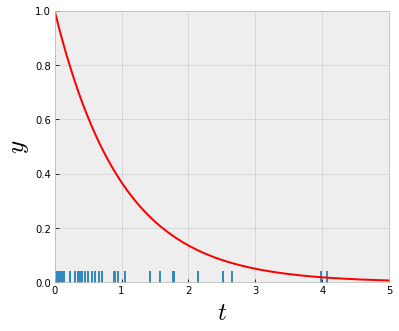

In [153]:
fig, ax = plt.subplots(figsize=(6,5)) 

ax.scatter(data, np.zeros(nevents), s = 500, marker = '|') 
ax.plot(x, expon(0,tau).pdf(x), lw=2, color="red")
ax.set_xlim(0,5)
ax.set_ylim(0,1)
ax.set_xlabel("$t$")
ax.set_ylabel("$y$")
fig.savefig("./figs/tau_distribution.png")

In [154]:
tau_estimate =  1./nevents * np.sum(data)
print (f"Best estimate is {tau_estimate:.2f}")

Best estimate is 0.92


In [155]:
sigma = np.sqrt(tau_estimate**2/nevents)
print (sigma)

0.12991268878310602


In [156]:
def llh(tau):
    likelihood = np.sum(np.log(expon(0, tau).pdf(data)))
    return likelihood

In [157]:
l = []
taus = np.arange(0.5, 1.6, 0.01)
for t in taus:
    l.append(llh(t))

In [158]:
print (sigma)

0.12991268878310602


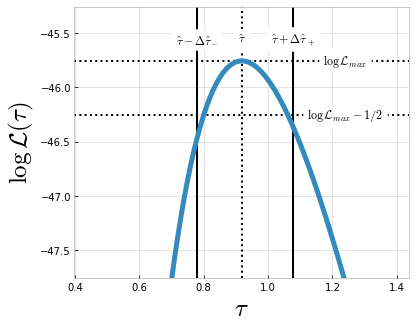

In [167]:
fig, ax3 = plt.subplots(figsize=(6,5)) 
ax3.set_facecolor("white")
ax3.set_xlabel(r"$\tau$")
ax3.set_ylabel(r"$\log \mathcal{L}(\tau)$")
ax3.axhline(y=np.max(l)-0.5, linestyle=":", color="black")
ax3.axhline(y=np.max(l), linestyle=":", color="black")
ax3.set_ylim(np.max(l)-2, np.max(l)+0.5)
ax3.axvline(x=tau_estimate, linestyle=":", color="black")
ax3.axvline(x=tau_estimate + 0.16, linestyle="-", color="black")
ax3.axvline(x=tau_estimate - 0.14, linestyle="-", color="black")
ax3.set_xlim(tau_estimate - 4 * sigma, tau_estimate + 4 * sigma)
ax3.plot(taus, l, lw=5)
ax3.text(tau_estimate + 2* 0.16, np.max(l) - 0.5, '$\log \mathcal{L}_{max} - 1/2$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate + 2* 0.16, np.max(l), '$\log \mathcal{L}_{max}$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate + 0.16, np.max(l)+0.2, r'$\hat{\tau} + \Delta \hat{\tau}_+$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate - 0.14, np.max(l)+0.2, r'$\hat{\tau} - \Delta \hat{\tau}_{-}$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate, np.max(l)+0.2, r'$\hat{\tau}$', fontsize=12, va='center', ha='center', backgroundcolor='w')
fig.savefig("./figs/tau_variance_graph.png")
plt.show()

In [168]:
nexperiments = 100
tau_estimates = []
for i in range(0, nexperiments):
   data = np.random.exponential(tau_estimate, nevents)
   tau_estimates.append(1./nevents * np.sum(data))

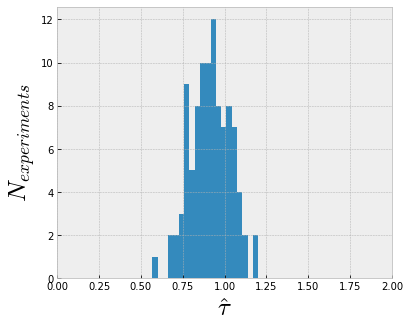

In [170]:
fig, ax2 = plt.subplots(figsize=(6,5)) 
ax2.hist(tau_estimates, bins = 20)
ax2.set_xlim(0, 2)
ax2.set_xlabel(r"$\hat{\tau}$")
ax2.set_ylabel("$N_{experiments}$")
fig.savefig("./figs/tau_estimate_distribution.png")
plt.show()

In [171]:
np.sqrt(np.var(tau_estimates))

0.11768732419160084

In [258]:
tau = 3
bg_events = 100
background = np.random.exponential(tau, bg_events)
sig_events = 7
mu = 1.5
sigma = 0.1
signal = np.random.normal(mu, sigma, sig_events)

ntotal = bg_events + sig_events

from argparse import Namespace

truth = Namespace(mu_s = sig_events, mu_b = bg_events)

print (truth)

Namespace(mu_s=7, mu_b=100)


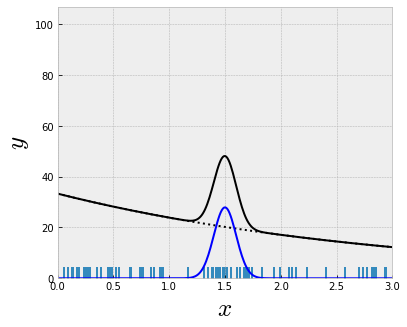

In [264]:
fig, ax = plt.subplots(figsize=(6,5)) 

ax.scatter(np.concatenate([background,signal]), np.zeros(bg_events + sig_events), s = 500, marker = '|') 
ax.plot(x, truth.mu_b*expon(0,tau).pdf(x), lw=2, linestyle=":", color="black")
ax.plot(x, truth.mu_s*norm(mu, sigma).pdf(x), lw=2, color="blue")
ax.plot(x, truth.mu_b*expon(0,tau).pdf(x)+truth.mu_s*norm(mu, sigma).pdf(x), lw=2, color="black")

ax.set_xlim(0,3)
ax.set_ylim(0,ntotal)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
fig.savefig("./figs/sig_background_distribution.png")

In [291]:
sample = np.concatenate([background, signal])


In [292]:

def likelihood(mu_s, mu_b, sample):
    values = np.log(mu_s * norm(mu, sigma).pdf(sample) + mu_b * expon(0, tau).pdf(sample), where= mu_s * norm(mu, sigma).pdf(sample) + mu_b * expon(0, tau).pdf(sample)>0)
    return (mu_s + mu_b) - np.sum(values)

In [293]:
L = []
mu_s_grid = np.linspace(-10, 100, 40)
mu_b_grid = np.linspace(-10, 300, 40)

for mus in mu_s_grid:
    Ls = []
    for mub in mu_b_grid:
        Ls.append(likelihood(mus, mub, sample))

    L.append(Ls)

L = np.array(L)

i_best = np.where(L == L.min())

print (i_best)

fitted = Namespace(mu_s = mu_s_grid[i_best[0]], mu_b = mu_b_grid[i_best[1]])

print (fitted)

(array([8]), array([13]))
Namespace(mu_s=array([12.56410256]), mu_b=array([93.33333333]))


In [294]:
L.max()

528.6555047985261

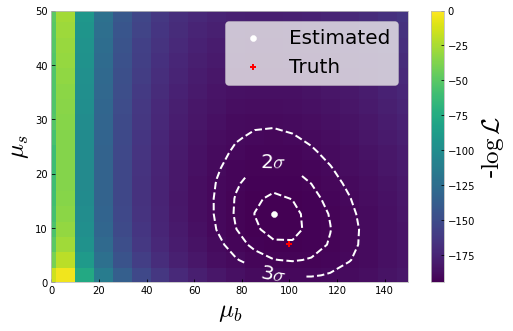

In [300]:
import matplotlib.colors as colors

fig1, ax1 = plt.subplots(figsize=(8,5))
#mesh = ax1.pcolormesh(mu_b_grid, mu_s_grid, L, shading="auto", norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01, vmin=L.min(), vmax =0))
mesh = ax1.pcolormesh(mu_b_grid, mu_s_grid, L, shading="auto", vmin = L.min(), vmax = 0)

cs = ax1.contour(mu_b_grid, mu_s_grid, L, [L.min() + 0.5, L.min() + 4./2., L.min() + 9./2.],colors='white')

fmt = {}
strs = ['1$\sigma$', '2$\sigma$', '3$\sigma$']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

plt.clabel(cs, cs.levels, inline=1, fmt=fmt, fontsize=20)

plt.scatter(fitted.mu_b, fitted.mu_s, marker='o',color='w', label="Estimated")

plt.scatter(truth.mu_b, truth.mu_s, marker='+',color='r', label="Truth")
cbar = plt.colorbar(mesh)
cbar.ax.set_ylabel('-$\log \mathcal{L}$')
plt.legend()
plt.xlabel('$\mu_b$')
plt.ylabel('$\mu_s$')
plt.xlim(0, 150)
plt.ylim(0, 50) 
plt.savefig("./figs/sig_background_bestfit.png")

In [301]:
def maximize(sample):
    L = []
    mu_s_grid = np.linspace(-10, 10, 50)
    mu_b_grid = np.linspace(-10, 300, 50)

    for mus in mu_s_grid:
        Ls = []
        for mub in mu_b_grid:
            Ls.append(likelihood(mus, mub, sample))

        L.append(Ls)

    L = np.array(L)

    i_best = np.where(L == L.min())

    print (i_best)

    fitted = Namespace(mu_s = mu_s_grid[i_best[0]], mu_b = mu_b_grid[i_best[1]])

    print (fitted)
    return fitted
    


In [302]:
mus = []
for exp in range(0, 1000):
    bg_events = 100
    background = np.random.exponential(tau, bg_events)
    sig_events = 2
    signal = np.random.normal(mu, sigma, sig_events)
    
    sample = np.concatenate([background, signal])
    fit = maximize(sample)
    mus.append(fit.mu_s)

(array([30]), array([17]))
Namespace(mu_s=array([2.24489796]), mu_b=array([97.55102041]))
(array([18]), array([18]))
Namespace(mu_s=array([-2.65306122]), mu_b=array([103.87755102]))
(array([29]), array([17]))
Namespace(mu_s=array([1.83673469]), mu_b=array([97.55102041]))
(array([37]), array([17]))
Namespace(mu_s=array([5.10204082]), mu_b=array([97.55102041]))
(array([23]), array([18]))
Namespace(mu_s=array([-0.6122449]), mu_b=array([103.87755102]))
(array([22]), array([18]))
Namespace(mu_s=array([-1.02040816]), mu_b=array([103.87755102]))
(array([21]), array([18]))
Namespace(mu_s=array([-1.42857143]), mu_b=array([103.87755102]))
(array([40]), array([17]))
Namespace(mu_s=array([6.32653061]), mu_b=array([97.55102041]))
(array([42]), array([17]))
Namespace(mu_s=array([7.14285714]), mu_b=array([97.55102041]))
(array([22]), array([18]))
Namespace(mu_s=array([-1.02040816]), mu_b=array([103.87755102]))
(array([29]), array([17]))
Namespace(mu_s=array([1.83673469]), mu_b=array([97.55102041]))
(

In [303]:
mus = np.array(mus).flatten()

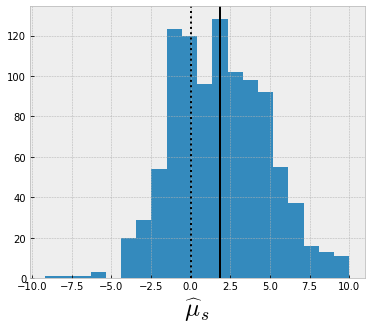

In [321]:
fig5, ax5 = plt.subplots(figsize=(6,5)) 

ax5.hist(mus, bins=20)
ax5.axvline(x=0,color="black", linestyle =":")
ax5.axvline(x=mus.mean(),color="black", linestyle ="-")
ax5.set_xlabel(r"$\widehat{\mu}_s$")
fig5.savefig("./figs/estimate_distribution_negvalues.png")

In [322]:
print (mus.mean())

1.882040816326531


2.016326530612245